In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# converts name to GW###### format for visualization purposes
def simplify_name(name):
    if str.startswith(name, "GW"):
        return "GW" + name[2:8]
    return "GW" + name[0:6]

# extracts version number from name
def extract_version(name):
    return name[-1:]

# extracts confidence from catalog.shortName
def extract_group(shortname):
    if "2.1" in shortname:
        return shortname[9:]
    return shortname[7:]

# gets confidence number of group
def extract_confidence(group):
    if group == "confident":
        return 3
    if group == "marginal":
        return 2
    if group == "auxiliary":
        return 1
    return 0

O3_all = pd.read_csv("../Data/GWTC-3.csv")
O3_all["simple_name"] = np.array([simplify_name(name) for name in O3_all["name"]])
O3_all["group"] = np.array([3 for _ in range(O3_all["name"].size)])
O3_all["catalog"] = np.array([extract_group(shortname) for shortname in O3_all["catalog.shortName"]])
O3_all["confidence"] = np.array([extract_confidence(group) for group in O3_all["catalog"]])
O3_all["group_name"] = np.array(["O" + str(group) for group in O3_all["group"]])
O3_all = O3_all[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance", "p_astro", "chi_eff"]]
O3_all = O3_all.rename(columns={"p_astro": "prob", "chi_eff": "effective_spin", "network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

O2_confident = pd.read_csv("../Data/GWTC-2_1-confident.csv")
O2_confident["simple_name"] = np.array([simplify_name(name) for name in O2_confident["name"]])
O2_confident["group"] = np.array([2 for _ in range(O2_confident["name"].size)])
O2_confident["group_name"] = np.array(["O" + str(group) for group in O2_confident["group"]])
O2_confident["catalog"] = np.array([extract_group(shortname) for shortname in O2_confident["catalog.shortName"]])
O2_confident["confidence"] = np.array([extract_confidence(group) for group in O2_confident["catalog"]])
O2_confident = O2_confident[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance", "p_astro", "chi_eff"]]
O2_confident = O2_confident.rename(columns={"p_astro": "prob", "chi_eff": "effective_spin", "network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

O2_marginal = pd.read_csv("../Data/GWTC-2_1-marginal.csv")
O2_marginal["simple_name"] = np.array([simplify_name(name) for name in O2_marginal["name"]])
O2_marginal["group"] = np.array([2 for _ in range(O2_marginal["name"].size)])
O2_marginal["group_name"] = np.array(["O" + str(group) for group in O2_marginal["group"]])
O2_marginal["catalog"] = np.array([extract_group(shortname) for shortname in O2_marginal["catalog.shortName"]])
O2_marginal["confidence"] = np.array([extract_confidence(group) for group in O2_marginal["catalog"]])
O2_marginal = O2_marginal[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance", "p_astro", "chi_eff"]]
O2_marginal = O2_marginal.rename(columns={"p_astro": "prob", "chi_eff": "effective_spin", "network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

O2_auxiliary = pd.read_csv("../Data/GWTC-2_1-auxiliary.csv")
O2_auxiliary["simple_name"] = np.array([simplify_name(name) for name in O2_auxiliary["name"]])
O2_auxiliary["group"] = np.array([2 for _ in range(O2_auxiliary["name"].size)])
O2_auxiliary["group_name"] = np.array(["O" + str(group) for group in O2_auxiliary["group"]])
O2_auxiliary["catalog"] = np.array([extract_group(shortname) for shortname in O2_auxiliary["catalog.shortName"]])
O2_auxiliary["confidence"] = np.array([extract_confidence(group) for group in O2_auxiliary["catalog"]])
O2_auxiliary = O2_auxiliary[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance", "p_astro", "chi_eff"]]
O2_auxiliary = O2_auxiliary.rename(columns={"p_astro": "prob", "chi_eff": "effective_spin", "network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

O1_all = pd.read_csv("../Data/GWTC-1.csv")
O1_all["simple_name"] = np.array([simplify_name(name) for name in O1_all["name"]])
O1_all["group"] = np.array([1 for _ in range(O1_all["name"].size)])
O1_all["catalog"] = np.array([extract_group(shortname) for shortname in O1_all["catalog.shortName"]])
O1_all["confidence"] = np.array([extract_confidence(group) for group in O1_all["catalog"]])
O1_all["group_name"] = np.array(["O" + str(group) for group in O1_all["group"]])
O1_all = O1_all[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance", "p_astro", "chi_eff"]]
O1_all = O1_all.rename(columns={"p_astro": "prob", "chi_eff": "effective_spin", "network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

observations = O3_all
observations = observations.append(O2_confident)
observations = observations.append(O2_marginal)
observations = observations.append(O2_auxiliary)
observations = observations.append(O1_all)

observations["total_mass"] = observations["mass1"] + observations["mass2"]
observations["mass_ratio"] = observations["mass1"] / observations["mass2"]
observations["mass_dos"] = abs(observations["mass2"] - observations["mass1"]) / observations["total_mass"]

observations["is_O1"] = observations["group"] == 1
observations["is_O2"] = observations["group"] == 2
observations["is_O3"] = observations["group"] == 3

confident = observations[observations['confidence'] == 3]

confident_blackholes = confident[confident['mass1'] > 2.16] # Only black hole binaries

confident_neutrons = confident[confident['mass1'] <= 2.16] # Only neutron star binaries
confident_neutrons = confident_neutrons[confident_neutrons['mass2'] <= 2.16]

confident_mixed = confident[confident['mass1'] <= 2.16] # Only black hole + neutron star binaries
confident_mixed = confident_mixed[confident_mixed['mass2'] > 2.16]

O3 = confident[confident['group'] == 3]
O2 = confident[confident['group'] == 2]
O1 = confident[confident['group'] == 1]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3225117769.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_confident)
C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3225117769.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_marginal)
C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3225117769.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_auxiliary)
C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3225117769.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O1_all)

In [4]:
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")
O4_all = O4_all[["eventid", "chirp_mass", "combined_far", "mass1", "mass2", "snr", "spin1z", "spin2z", "template_duration", "likelihood"]]
O4_all["group"] = np.array([4 for _ in range(O4_all["eventid"].size)])
O4_all["group_name"] = np.array(["O" + str(group) for group in O4_all["group"]])
O4_all = O4_all.rename(columns={"combined_far": "far"})

O3_all = pd.read_csv("../Data/real_events_O3_ALL.csv")
O3_all = O3_all[["eventid", "chirp_mass", "combined_far", "mass1", "mass2", "snr", "spin1z", "spin2z", "template_duration", "chisq", "likelihood"]]
O3_all["group"] = np.array([3 for _ in range(O3_all["eventid"].size)])
O3_all["group_name"] = np.array(["O" + str(group) for group in O3_all["group"]])
O3_all = O3_all.rename(columns={"combined_far": "far"})

events = O4_all
events = events.append(O3_all)

events["total_mass"] = events["mass1"] + events["mass2"]
events["mass_ratio"] = events["mass1"] / events["mass2"]
events["mass_dos"] = abs(events["mass2"] - events["mass1"]) / events["total_mass"]

O4_events = events[events['group'] == 4]
O3_events = events[events['group'] == 3]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\251306348.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events = events.append(O3_all)


In [5]:
O3_all_predicted = pd.read_csv("../Data Analysis/PredictedData/O3_ALL_predicted.csv")
O3_mock = pd.read_csv("../Data Analysis/PredictedData/O3_mock.csv")

In [6]:
confident_neutrons

,name,simple_name,catalog,confidence,version,group_name,group,gps,far,snr,...,redshift,luminosity_distance,prob,effective_spin,total_mass,mass_ratio,mass_dos,is_O1,is_O2,is_O3
37,GW190425_081805-v3,GW190425,confident,3,3,O2,2,1.240216e+09,3.400000e-02,12.4,...,0.03,150.0,0.78349,0.07,3.40,1.615385,0.235294,False,True,False
2,GW170817-v3,GW170817,confident,3,3,O1,1,1.187009e+09,1.000000e-07,33.0,...,0.01,40.0,1.00000,0.00,2.73,1.149606,0.069597,True,False,False


GW170817 was the first neutron star merger detected and GW190425 is another known neutron star merger, so the method that is being used to discriminate neutron star mergers from black hole mergers is working properly. 

<Axes: xlabel='total_mass', ylabel='Count'>

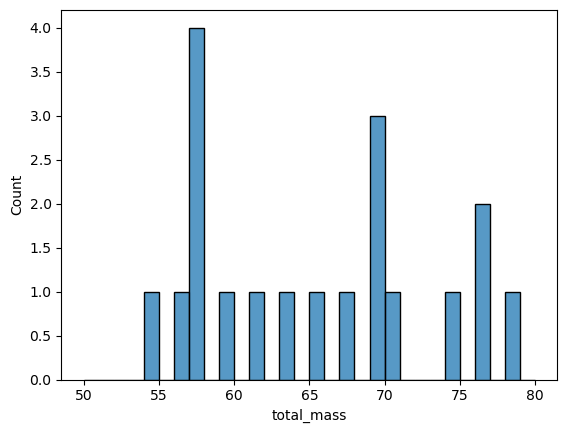

In [7]:
sns.histplot(O2["total_mass"], binwidth=1, binrange=[50, 80])

In [8]:
bin = O2[O2["total_mass"] >= 57.5]
bin = bin[bin["total_mass"] <= 58]
bin

,name,simple_name,catalog,confidence,version,group_name,group,gps,far,snr,...,redshift,luminosity_distance,prob,effective_spin,total_mass,mass_ratio,mass_dos,is_O1,is_O2,is_O3
10,GW190828_063405-v2,GW190828,confident,3,2,O2,2,1.251009e+09,0.00001,16.5,...,0.38,2070.0,1.00000,0.15,57.7,1.236434,0.105719,False,True,False
27,GW190527_092055-v2,GW190527,confident,3,2,O2,2,1.242984e+09,0.23000,8.0,...,0.44,2520.0,0.84784,0.10,57.8,1.603604,0.231834,False,True,False
40,GW190413_052954-v2,GW190413,confident,3,2,O2,2,1.239169e+09,0.82000,9.0,...,0.56,3320.0,0.92750,-0.04,57.9,1.392562,0.164076,False,True,False


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

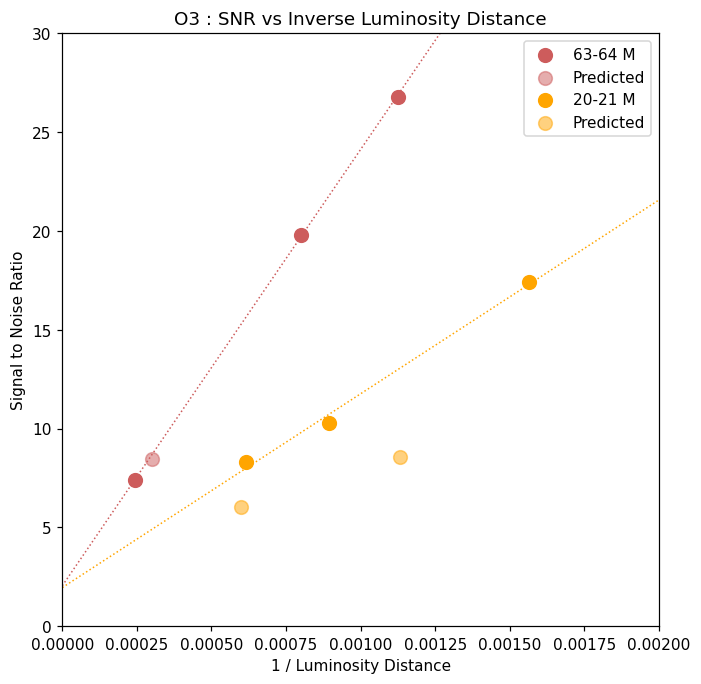

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [63, 20]
bin_highs = [64, 21]
colors = ["indianred", "orange", "darkcyan", "dodgerblue", "slateblue"]

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O3[O3["total_mass"] >= low]
    values = values[values["total_mass"] <= high]
    a, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=80, label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + b, color=color, linestyle=":", linewidth=1)

    values = O3_all_predicted[O3_all_predicted["total_mass"] >= low]
    values = values[values["total_mass"] <= high]

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=80, alpha=0.5, label="Predicted")

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.002)
ax.set_ylim(0, 30)

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

Text(0.5, 1.0, 'O2 : SNR vs Inverse Luminosity Distance')

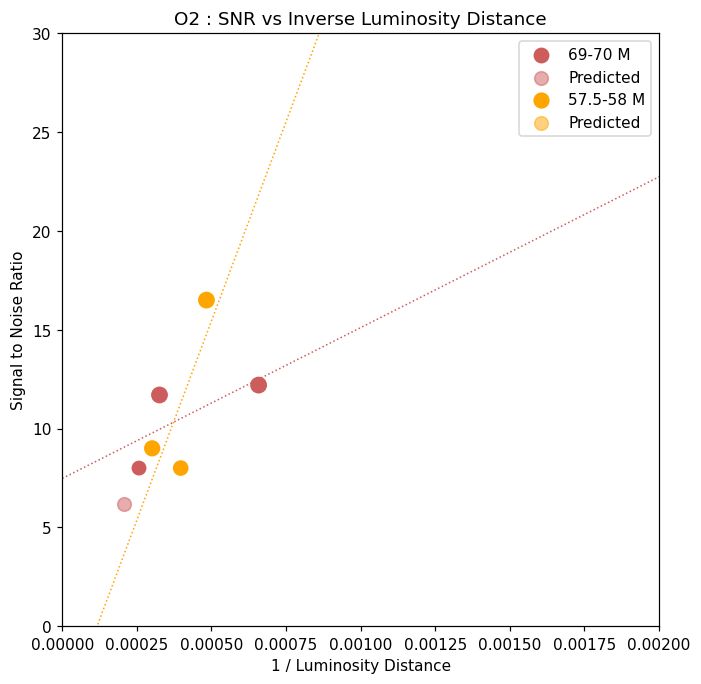

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [69, 57.5]
bin_highs = [70, 58]
colors = ["indianred", "orange", "darkcyan", "dodgerblue", "slateblue"]

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O2[O2["total_mass"] >= low]
    values = values[values["total_mass"] <= high]
    a, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=100 * values["prob"], label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + b, color=color, linestyle=":", linewidth=1)

    values = O3_all_predicted[O3_all_predicted["total_mass"] >= low]
    values = values[values["total_mass"] <= high]

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=80, alpha=0.5, label="Predicted")

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.002)
ax.set_ylim(0, 30)

ax.set_title("O2 : SNR vs Inverse Luminosity Distance")

<Axes: xlabel='total_mass', ylabel='Count'>

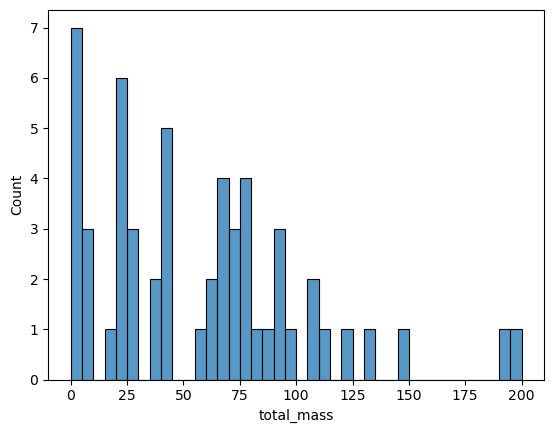

In [11]:
sns.histplot(O3_events["total_mass"], binwidth=5, binrange=[0, 200])

<Axes: xlabel='total_mass', ylabel='Count'>

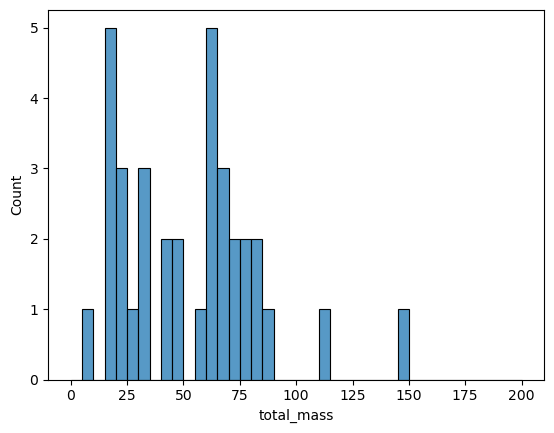

In [12]:
sns.histplot(O3["total_mass"], binwidth=5, binrange=[0, 200])

<Axes: xlabel='total_mass', ylabel='Count'>

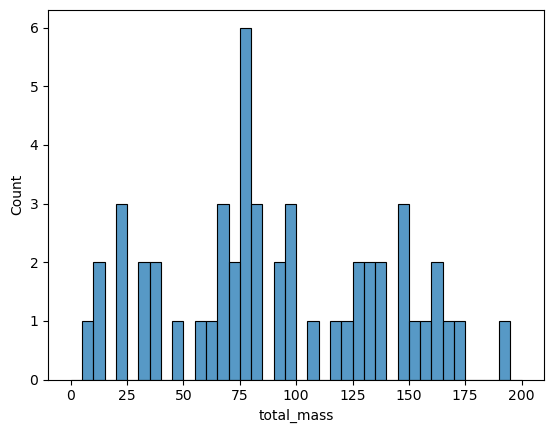

In [13]:
sns.histplot(O4_events["total_mass"], binwidth=5, binrange=[0, 200])

Text(0.5, 1.0, 'O3 vs O4')

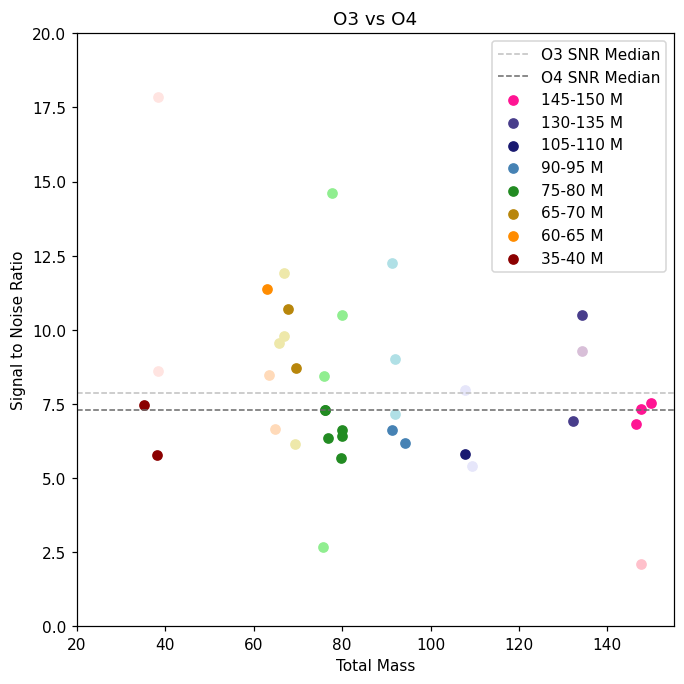

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [145, 130, 105, 90, 75, 65, 60, 35, 20]
bin_highs = [150, 135, 110, 95, 80, 70, 65, 40, 25]
O3_colors = ["pink", "thistle", "lavender", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "midnightblue", "steelblue", "forestgreen", "darkgoldenrod", "darkorange", "darkred"]

median_O3_SNR = np.median(O3_events["snr"])
ax.axhline(median_O3_SNR, color="silver", linestyle="--", linewidth=1, label="O3 SNR Median")

median_O4_SNR = np.median(O4_events["snr"])
ax.axhline(median_O4_SNR, color="dimgrey", linestyle="--", linewidth=1, label="O4 SNR Median")

for low, high, O3color, O4color in zip(bin_lows, bin_highs, O3_colors, O4_colors):
    O3values = O3_events[O3_events["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], color=O3color)

    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color, label=f"{low}-{high} M")

    line_values = np.array([0, 100])

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(20, 155)
ax.set_ylim(0, 20)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

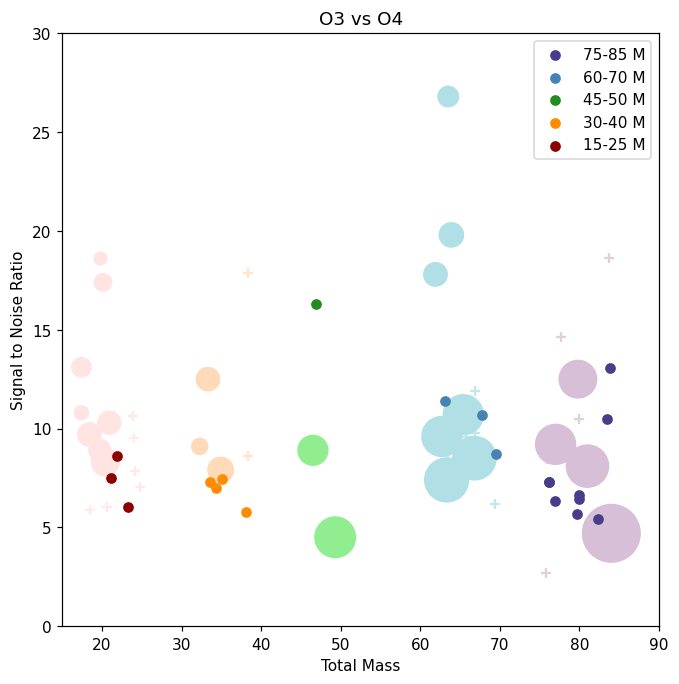

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [75, 60, 45, 30, 15]
bin_highs = [85, 70, 50, 40, 25]
O3_colors = ["thistle", "powderblue", "lightgreen", "peachpuff", "mistyrose"]
O4_colors = ["darkslateblue", "steelblue", "forestgreen", "darkorange", "darkred"]

for low, high, O3color, O4color in zip(bin_lows, bin_highs, O3_colors, O4_colors):
    O3values = O3[O3["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], 0.2 * O3values["luminosity_distance"], color=O3color)

    O3values_all = O3_events[O3_events["total_mass"] >= low]
    O3values_all = O3values_all[O3values_all["total_mass"] <= high]

    ax.scatter(O3values_all["total_mass"], O3values_all["snr"], marker = "+", alpha=0.75, color=O3color)

    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color, label=f"{low}-{high} M")

    line_values = np.array([0, 100])

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(15, 90)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'O3 vs O4')

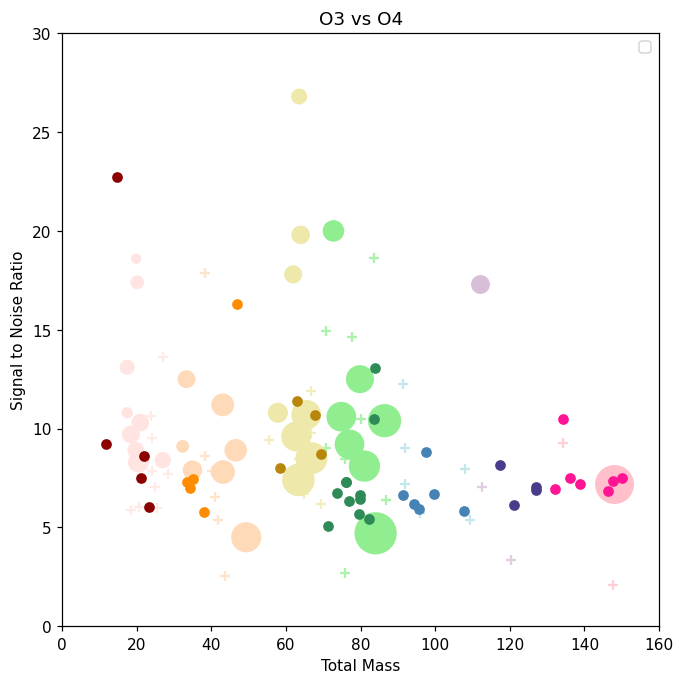

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]
O3_colors = ["pink", "thistle", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "steelblue", "seagreen", "darkgoldenrod", "darkorange", "darkred"]

line_values = np.array([5, 155])

for low, high, O3color in zip(bin_lows, bin_highs, O3_colors):
    O3values = O3[O3["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], 0.1 * O3values["luminosity_distance"], color=O3color)

    O3values_all = O3_events[O3_events["total_mass"] >= low]
    O3values_all = O3values_all[O3values_all["total_mass"] <= high]

    ax.scatter(O3values_all["total_mass"], O3values_all["snr"], marker = "+", alpha=0.75, color=O3color)

for low, high, O4color in zip(bin_lows, bin_highs, O4_colors):
    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color)

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

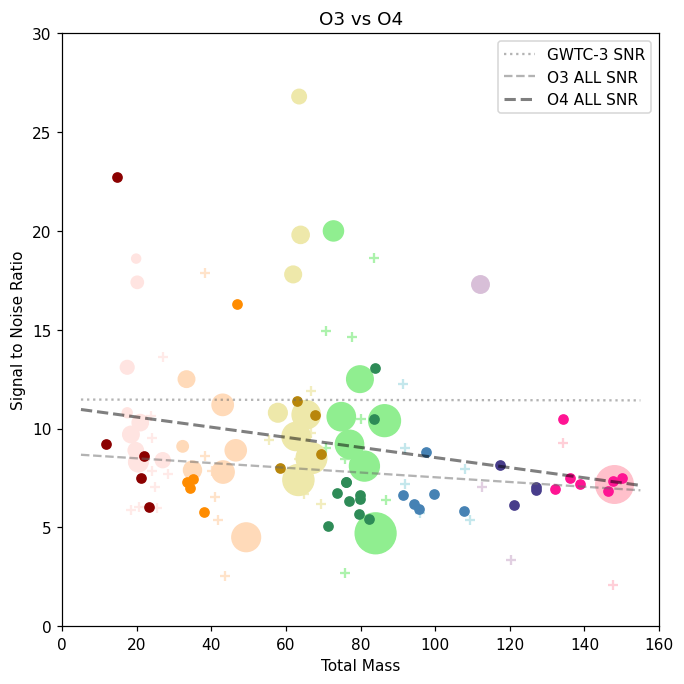

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]
O3_colors = ["pink", "thistle", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "steelblue", "seagreen", "darkgoldenrod", "darkorange", "darkred"]

line_values = np.array([5, 155])

aO3, bO3 = np.polyfit(O3["total_mass"], O3["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle=":", linewidth=1.5, alpha=0.5, label="GWTC-3 SNR")

aO3, bO3 = np.polyfit(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle="--", linewidth=1.5, alpha=0.5, label="O3 ALL SNR")

aO4, bO4 = np.polyfit(O4_events["total_mass"], O4_events["snr"], 1)
ax.plot(line_values, aO4 * line_values + bO4, color="black", linestyle="--", linewidth=2, alpha=0.5, label="O4 ALL SNR")

for low, high, O3color in zip(bin_lows, bin_highs, O3_colors):
    O3values = O3[O3["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], 0.1 * O3values["luminosity_distance"], color=O3color)

    O3values_all = O3_events[O3_events["total_mass"] >= low]
    O3values_all = O3values_all[O3values_all["total_mass"] <= high]

    ax.scatter(O3values_all["total_mass"], O3values_all["snr"], marker = "+", alpha=0.75, color=O3color)

for low, high, O4color in zip(bin_lows, bin_highs, O4_colors):
    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color)

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

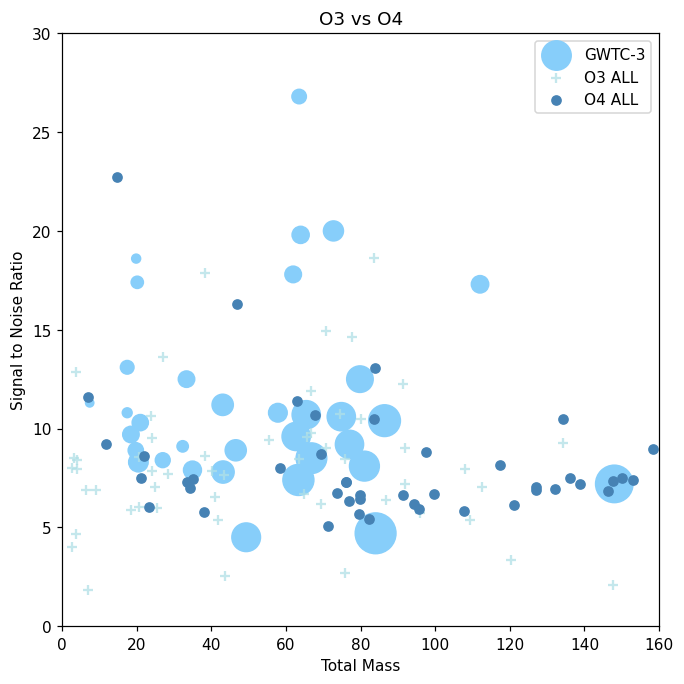

In [18]:
ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

# O3 ALL

ax.scatter(O3_events["total_mass"], O3_events["snr"], marker="+", color="powderblue", alpha=0.75, label="O3 ALL")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

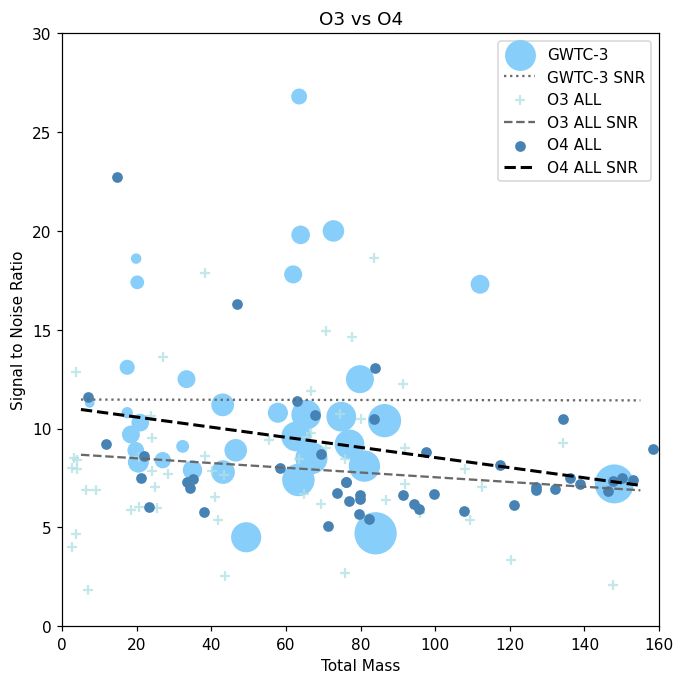

In [19]:
ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

aO3, bO3 = np.polyfit(O3["total_mass"], O3["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle=":", linewidth=1.5, label="GWTC-3 SNR")

# O3 ALL

ax.scatter(O3_events["total_mass"], O3_events["snr"], marker="+", color="powderblue", alpha=0.75, label="O3 ALL")

aO3, bO3 = np.polyfit(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle="--", linewidth=1.5, label="O3 ALL SNR")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

aO4, bO4 = np.polyfit(O4_events["total_mass"], O4_events["snr"], 1)
ax.plot(line_values, aO4 * line_values + bO4, color="black", linestyle="--", linewidth=2, label="O4 ALL SNR")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

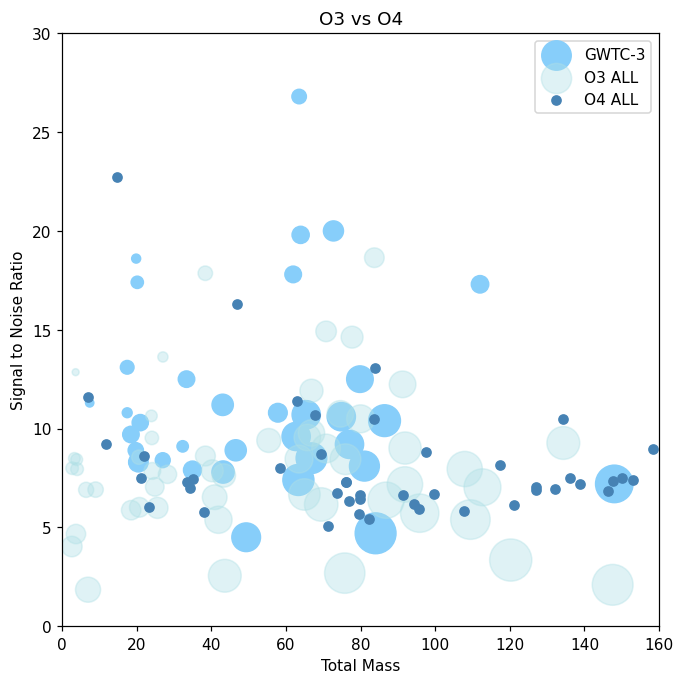

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

# O3 ALL

ax.scatter(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 0.1 * O3_all_predicted["luminosity_distance"], alpha=0.4, color="powderblue", label="O3 ALL")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

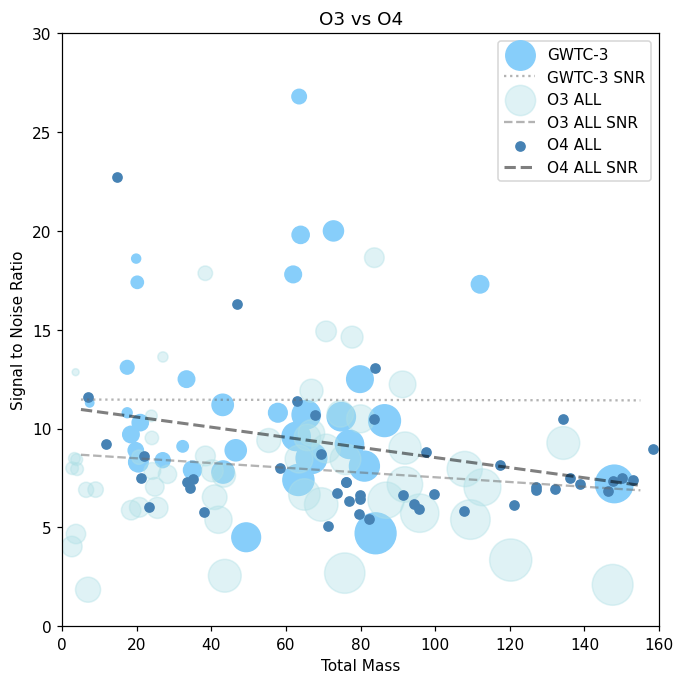

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

aO3, bO3 = np.polyfit(O3["total_mass"], O3["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle=":", linewidth=1.5, alpha=0.5, label="GWTC-3 SNR")

# O3 ALL

ax.scatter(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 0.1 * O3_all_predicted["luminosity_distance"], alpha=0.4, color="powderblue", label="O3 ALL")

aO3, bO3 = np.polyfit(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle="--", linewidth=1.5, alpha=0.5, label="O3 ALL SNR")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

aO4, bO4 = np.polyfit(O4_events["total_mass"], O4_events["snr"], 1)
ax.plot(line_values, aO4 * line_values + bO4, color="black", linestyle="--", linewidth=2, alpha=0.5, label="O4 ALL SNR")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

I'm trying to understand the outputs of the model below using fake O3 data.

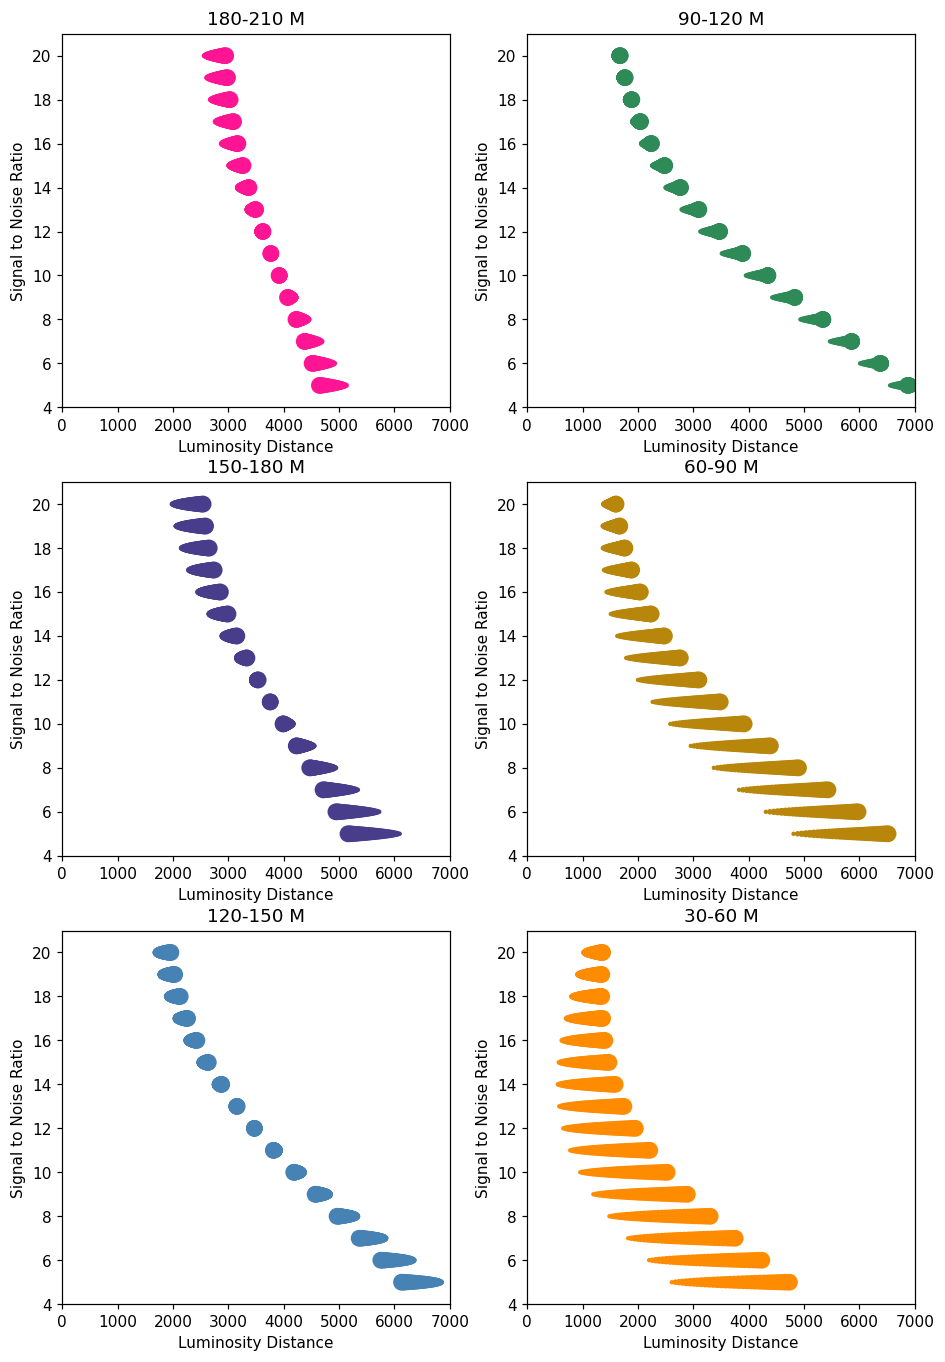

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15), dpi=110)

# setting bins
bin_lows = [180, 150, 120, 90, 60, 30]
bin_highs = [210, 180, 150, 120, 90, 60]
O3_colors = ["pink", "thistle", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "steelblue", "seagreen", "darkgoldenrod", "darkorange", "darkred"]

line_values = np.array([0, 210])

for low, high, O3color, ri, li in zip(bin_lows, bin_highs, O4_colors, [0, 1, 2, 0, 1, 2], [0, 0, 0, 1, 1, 1]):
    values = O3_mock[O3_mock["total_mass"] >= low]
    values = values[values["total_mass"] <= high]

    values = values[values["snr"] >= 5]

    scaled_masses = MinMaxScaler().fit_transform(np.array(values["total_mass"]).reshape(-1, 1))

    ax[ri, li].scatter(values["luminosity_distance"], values["snr"], 100 * scaled_masses, alpha=1, color=O3color, label=f"{low}-{high} M")

    ax[ri, li].set_xlabel("Luminosity Distance")
    ax[ri, li].set_ylabel("Signal to Noise Ratio")

    ax[ri, li].set_xlim(0, 7000)
    ax[ri, li].set_ylim(4, 21)

    ax[ri, li].set_title(f"{low}-{high} M")

Binning

Removing Neutron Star Events

In [79]:
O3_clean = O3[O3["mass2"] > 2.16]

In [83]:
def get_bins(df, feature):
    max_mass = max(df[feature])
    min_mass = min(df[feature])

    # Sturge's Rule
    total_bins = round(1 + 3.322 * np.log10(len(df[feature])))

    bin_length = (max_mass - min_mass) / total_bins

    bins = []
    bin_ranges = []

    for i in range(total_bins):
        low = min_mass + bin_length * i
        values = df[df[feature] >= low]

        high = low + bin_length
        values = values[values[feature] <= high]
        
        if len(values[feature]) != 0:
            bins.append(values)
            bin_ranges.append((low, high))

    return bins, bin_ranges

In [84]:
def calculate_slope(x, y, min_y):
    y_reduced = y - min_y
    
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y_reduced, rcond=None)
    
    return a[0]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

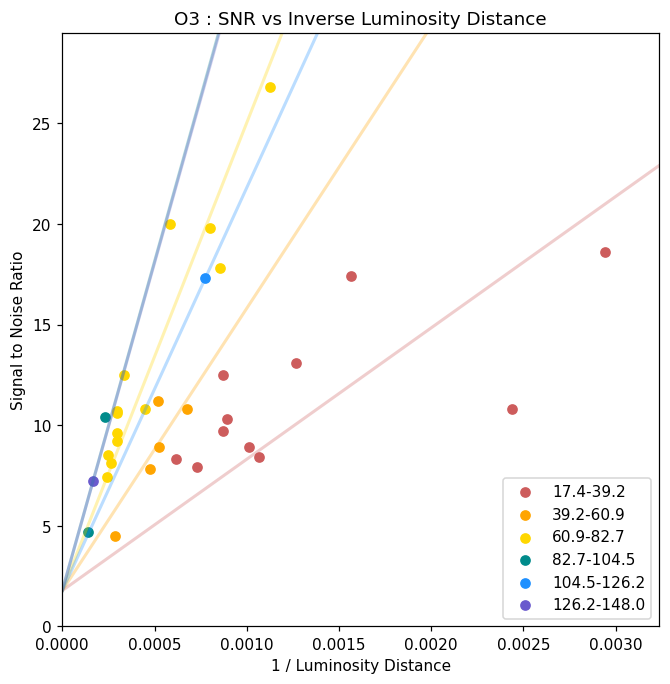

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O3_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]
intercepts = list()

for values in bins:
    if len(values["snr"]) > 1:
        _, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)
        intercepts.append(b)

y_intercept = np.mean(intercepts)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O3_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O3_clean["snr"]))

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

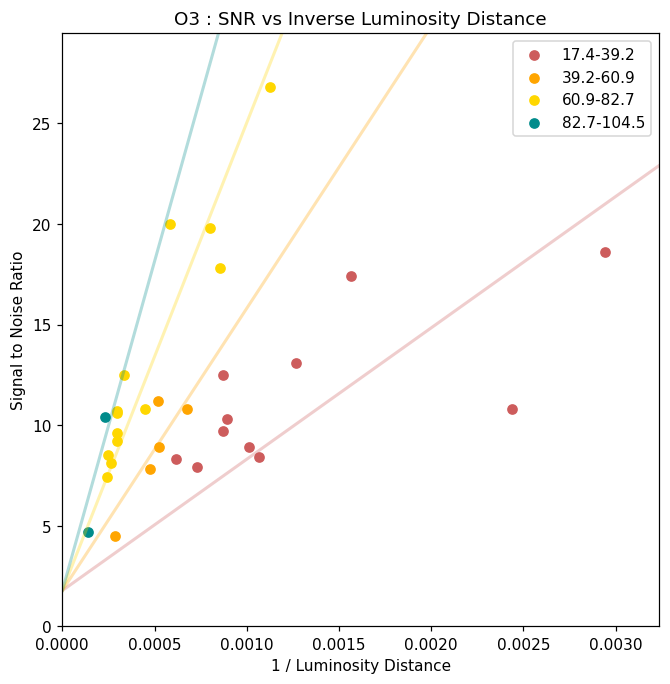

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O3_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]
intercepts = list()

for values in bins:
    if len(values["snr"]) > 1:
        _, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)
        intercepts.append(b)

y_intercept = np.mean(intercepts)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    if len(values["snr"]) > 1:
        a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

        ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

        ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O3_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O3_clean["snr"]))

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

In [95]:
O2_clean = O2[O2["mass2"] > 2.16]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O2 : SNR vs Inverse Luminosity Distance')

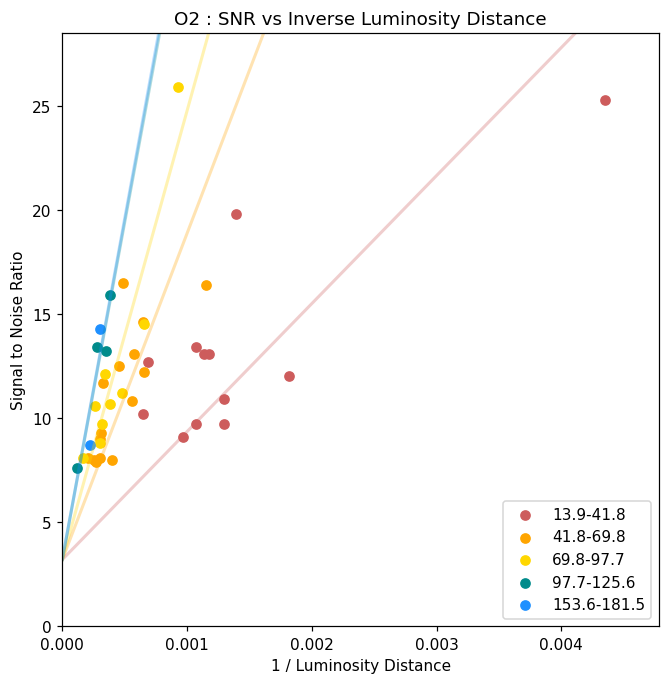

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O2_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]
intercepts = list()

for values in bins:
    if len(values["snr"]) > 1:
        _, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)
        intercepts.append(b)

y_intercept = np.mean(intercepts)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O2_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O2_clean["snr"]))

ax.set_title("O2 : SNR vs Inverse Luminosity Distance")

In [99]:
O1_clean = O1[O1["mass2"] > 2.16]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11148\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O1 : SNR vs Inverse Luminosity Distance')

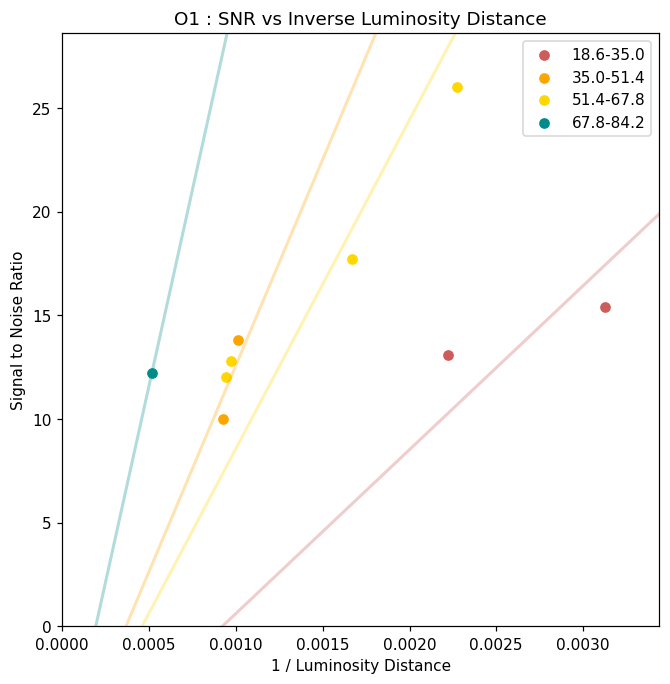

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O1_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]
intercepts = list()

for values in bins:
    if len(values["snr"]) > 1:
        _, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)
        intercepts.append(b)

y_intercept = np.mean(intercepts)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O1_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O1_clean["snr"]))

ax.set_title("O1 : SNR vs Inverse Luminosity Distance")